#Introduction
<sup>Written by Livia Lane and Ashly Hervey</sub>

Our project uses Reinforcement learning to train an agent to play Connect-4. More specifically we use Q-learning as our type of Reinforcement learning in this project. In its simplest form Q-learning is a type of Reinforcement learning that uses a rewards based system to choose the agent's next best course of action. In Q-learning you have a Q-table which is a sort of lookup table where the agent can find its next best move. The agent finds its next best move in the Q-table by determining which move has the highest reward value.

<br />

Q-Learning is based on three things: a state, an action, and a Q-Table. In the case of Connect-4, the state is the state of the board, as in where the tokens are placed. The actions that a player can take is placing a token in slot 1-7, although in the case of our game we chose to label these positions 0-6.
A Q-Table is a table containing all possible states, and the correlating Q-values for each state. Q-Learning provides a simple learning algorithm that takes in a state, determines the next state, and then calculates a Q-Value for the action taken to get to the next state. This Q-Value is what determines how good an action is so that the algorithm learns to take that action.
The following outlines our process to explore Q-Learning as a potential way to apply reinforcement machine learning to Connect-4.


##Overview of What We Did and Why
<sup>Written by Ashly Hervey</sub>

In our project we use two Q-tables. Typically in Q-learning you would have a massive Q-table based on every possible gamestate, however as Connect-4 is a solved game with over four trillion potential game states it is beyond the scope of basic Q-learning to populate the table based on that. As such we took a different approach. We decided to make two Q-tables, one based on a blank slate type of Q-learning and one based on our data. The blank slate Q-table is initially empty and is updated over each game played. We ran several tests that showed the effectiveness of this which will be gone over in depth later, but in essence we tracked the performance of the agent based on the increased size and complexity of this Q-table for various different experiments. For the data based Q-table we took a similar approach however the Q-table did not start out blank in this case, it started out with the data we chose. We populated this Q-table with 67,556 features and assigned rewards according to the corresponding labels of the data (win, loss, draw).

<br />

We chose to perform six experiments with this setup:



*   Experiment one showed how well the blank slate Q-Table agent performed against a random agent over a given number of epochs. This experiment was performed to show if the initially blank QTable agent would perform better than the random agent the more it was trained(increased number of epochs).
*   Experiment two showed how well the Data Q-Table agent performed against a random agent over a given number of epochs. This experiment was performed to show if the Data QTable agent would perform better than the random agent  the more it was trained.

*   Experiment three showed how well the blank slate Q-Table agent performed against the Data Q-Table agent over a given number of epochs when the QTable and Data QTable agents were trained against themselves. This experiment was performed to show if the initially blank QTable agent or the Data QTable agent would perform better the more it was trained given that they were trained separately.

*   Experiment four showed how well the blank slate Q-Table agent performed against the Data Q-Table agent over a given number of epochs when the QTable and Data QTable agents were trained against each other. This experiment was performed to show if the initially blank QTable agent or the Data QTable agent would perform better the more it was trained given that they were trained together.

*   Experiment five showed how well the blank slate Q-Table agent performed against a person over a given number of epochs. This experiment was performed to show if the initially blank QTable agent would perform well against a human player the more it was trained.

*   Finally, experiment six showed how well the Data Q-Table agent performed against a person over a given number of epochs. This experiment was performed to show if the Data QTable agent would perform well against a human player the more it was trained.


# Describing our Dataset
<sup>Written by Livia Lane</sub>

The dataset we used was created by Josh Tromp, who did research into Connect 4 as it is a solved game. The dataset includes 67,556 different game states from the first 8 moves made in the game. It then states if the game was a win, loss, or draw based on player one. The data comes in the format of a list of letters, with ‘b’ being a blank, ‘x’ being player one, and ‘o’ being player 2. The data is a list of 42 of these letters, with the order starting from the first column in the bottom row and going up each column, from bottom up left to right.

#Connect 4 Game

## Initial Game Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Hyperparameter Selection
<sup>Written by Livia Lane</sub>

When it comes to Q-Learning, there are three hyperparameters to keep track of. For one, there is the learning rate, which we call alpha, which helps to select the rate of learning. For this, we chose to look into what a good ideal learning rate would be in a typical Q-Learning equation. There is also the discount factor, which helps take into consideration the future rewards that will come into play. We decided to have a higher discount factor because we wanted to take into consideration future rewards, since most actions would not get very many rewards as they rarely lead to a win.

<br />


Finally, there is the epsilon factor, which is used in our greedy epsilon function. This is the value that determines if you are doing exploration, that is doing a random action and seeing the result, or exploitation, which is using the Q-Table to see which is the best next result. A epsilon closer to one will have you do more exploitation, while a variable closer to zero will have more exploitation. When starting out the training, you want to have a high value for exploration since the Q-Table will mostly be empty and not have data to reference. However, as the data continues to be trained we wanted to take advantage of our Q-Table more, which is why we made a decay function that decreases the value as it runs through each epoch of the game.



In [4]:
#Global Variables
who_won = 'no one'
global_count = [0, 0, 0, 0, 0, 0, 0]

action = np.array([0,1,2,3,4,5,6])
QTable = {}
data_QTable = {}

alpha = 0.8 ## learning rate
gamma = 0.9 ## discount factor
epsilon = 1 ## exploration vs exploitation
num_moves = 42

dataset = np.loadtxt('connectData.data', delimiter=',', dtype=str)

Alongside our hyperparameters, we also keep a few other variables necessary for the game. This includes the following:

- who_won: a variable to keep track of the winner of the game
- global_count: in order to keep track of the amount of tokens in each column, we adopted the variable count to keep track of that. Global count is used to help build a Q-Table based on the available actions


### Game Setup
<sup>Written by Livia Lane</sub>

For setting up our game, we decided to set it up as a 6x7 matrix since it was visually similar to the way connect 4 looks, and would be easy for us as the users to see what was happening in the game. The spots on the game board could have one of three values: ‘b’ for a blank spot, ‘x’ for player one, and ‘o’ for player two. We chose this design as it matched with the dataset we found, and therefore made it easier to convert the data into a board and use that data later in our program.

<br />


The player can choose from actions 0-6, with 0 being the 1st column and 6 being the 7th column.



In [5]:
#The Board
def initial_board():
  return [['b', 'b', 'b', 'b', 'b', 'b', 'b'],
         ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
         ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
         ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
         ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
         ['b', 'b', 'b', 'b', 'b', 'b', 'b']]

def reset_QTable():
  return {}

Our first step was to set up a way for the machine and potential player to be able to play the game. The following code is code used to add in a piece and determine if there is a winning state.

In [21]:
#Writen by Ashly, bug fixed by Livia
def add_piece(position, board, num):
    count = len(board) - 1
    while count > -1:
        if board[count][position] == 'b':
            board[count][position] = num
            break
        count -= 1
    return board


def win(board):
    board = np.array(board)
    if horizontal_vertical(board) or horizontal_vertical(board.T) or diagonal_win(board):
        return True
    return False


def horizontal_vertical(board):
    global who_won
    for x in board:
        player_pos = any(['x', 'x', 'x', 'x'] == list(x) for x in zip(*[x[i:] for i in range(len(['x', 'x', 'x', 'x']))]))
        if player_pos == True:
            who_won = 'Player one'
            return True
        player_neg = any(['o', 'o', 'o', 'o'] == list(x) for x in zip(*[x[i:] for i in range(len(['o', 'o', 'o', 'o']))]))
        if player_neg == True:
            who_won = 'Player two'
            return True
    return False


def diagonal_win(board):
  global who_won
  board = board.T
  count = -2
  while count <= 3:
      x = np.diagonal(board, offset=count)
      player_pos_left_down = any(['x', 'x', 'x', 'x'] == list(x) for x in zip(*[x[i:] for i in range(len(['x', 'x', 'x', 'x']))]))
      if player_pos_left_down == True:
          who_won = 'Player one'
          return True
      y = np.diagonal(np.fliplr(board), offset=count)
      player_pos_left_down = any(['x', 'x', 'x', 'x'] == list(y) for y in zip(*[y[i:] for i in range(len(['x', 'x', 'x', 'x']))]))
      if player_pos_left_down == True:
          who_won = 'Player one'
          return True
      x = np.diagonal(board, offset=count)
      player_neg_left_down = any(['o', 'o', 'o', 'o'] == list(x) for x in zip(*[x[i:] for i in range(len(['o', 'o', 'o', 'o']))]))
      if player_neg_left_down == True:
          who_won = 'Player two'
          return True
      y = np.diagonal(np.fliplr(board), offset=count)
      player_neg_left_down = any(['o', 'o', 'o', 'o'] == list(y) for y in zip(*[y[i:] for i in range(len(['o', 'o', 'o', 'o']))]))
      if player_neg_left_down == True:
          who_won = 'Player two'
          return True
      count += 1

def symmetrical_board(board):
  return board

## Q-Learning Setup
<sup>Written by Livia Lane</sub>

Connect-4 is a solved game with over 4.5 trillion potential game states, and even when considering symmetry and impossible states, there are still over 1 trillion states that would need to be taken care of. In traditional Q-Learning, you would initially make a Q-Table that is made to represent all possible game states, and empty values for each possible action associated with that state. However it wasn't practical for our purposes to make a Q-Table that large, which is why we instead opted to create an empty Q-Table that added in states as it encountered them. That's why we chose to use a dictionary as a Q-Table, which would add states based on a board state. The board state is represented in the dictionary as a string key, which starts building the string based on the values in the bottom row and going up each column, from bottom up left to right.

The following code is our way to convert a game board into a state-key to save in our Q-Table

In [22]:
#Written by Livia
def convert_state_to_key(board):
  gamestate = ""
  columNum = 0
  while columNum < 7:
      arr = []
      for row in board:
          arr.append(row[columNum])
      index = len(arr) - 1
      while index > -1:
          gamestate += (arr[index])
          index -= 1
      columNum += 1
  return gamestate


When we first set up the game, it was made to take in user inputs. When having human players, if a player were to make an invalid move, the game can simply prompt the user to redo that move. However we decided it wouldn't be effective to do that with our machine, so we instead decided to make a function that looks for valid movements and allows our agent to choose from that list.

<br />


The following code is code that checks for and makes a list of valid actions. It also includes a function that can make a random move based on the list of valid actions.

In [23]:
#Written by Livia, bug fixed by Ashly
def check_valid_move(position, count):
  if(position > 6 or position < 0):
    return False
    temp = position
  if (count[position] + 1 <= 6):
          return True
  return False


def valid_actions(count):
  valid_actions = []
  for i in range(7):
    if check_valid_move(i, count):
      valid_actions.append(i)
  return valid_actions


def random_action(count):
  valid_action_list = valid_actions(count)
  index = np.random.randint(len(valid_action_list))
  return valid_action_list[index]

The following are the actual functions that run our Q-learning agent. For one, we have the epsilon greedy method which determines whether we will be doing exploitation or exploration, and determines what action to take based on that. We check to see if a random number between 1 and 0 is less than our epsilon number, and if it is we do a random action. We also do a random action if the state hasn’t yet been added into the Q-Table. Otherwise, we choose the best action based on the Q-Table values for that state.

<br />


Our next function is a function to update the values in the Q table based on the action and the consequences for that action. We used the rewards function to assign rewards to each action that the agent makes, and after going through the equation it updates the Q table when necessary. For the rewards, if the agent won with that move it would be a one, if the other player won it would be a negative one, and if the move was in the middle column it would get a reward of 0.5. The reason the middle column gets an additional reward is because all non vertical wins rely on the middle column, so it's an advantage to have pieces in that column.


In [24]:
#Written by Livia, bug fixed by Ashly
def epsilon_greedy_action(state, count, qtable = QTable):
    if np.random.rand() < epsilon:
        return random_action(count)
    else:
        state_key = convert_state_to_key(state)
        symmetrical_key = convert_state_to_key(symmetrical_board(state))
        if state_key in QTable: #State is in QTable
            return max(QTable[state_key], key=QTable[state_key].get)
        if symmetrical_key in QTable:
            return max(QTable[symmetrical_key], key=QTable[symmetrical_key].get)
        else: #State Not in QTable
            return random_action(count)


def update_q_table(state, action, reward, next_state, count, qtable = QTable):
    previous_count = [i for i in count]
    previous_count[action] -= 1
    #Initial State
    state_key = convert_state_to_key(state)
    #The action taken
    next_state_key = convert_state_to_key(next_state)
    if state_key not in QTable: #add initial state if not already in q table
        QTable[state_key] = {a: 0 for a in range(7)}

    if next_state_key not in QTable: #add state after action taken if not in q table
        QTable[next_state_key] = {action: 0 for action in range(7)}

    # Update Q value using Q learning formula
    QTable[state_key][action] += alpha * (reward + gamma * max(QTable[next_state_key].values()) - QTable[state_key][action])


def calculate_reward(state, player, action):
  if(win(state)):
    if who_won == player:
      return 1
    else:
      return -1
  if action == 3:
    return 0.5
  return 0.5


def epsilon_decay(epoch):
  global epsilon
  epsilon_min = 0.1
  epsilon_decay = 0.001
  epsilon = max(epsilon_min, epsilon - epsilon_decay * epoch)


def epsilon_reset():
  global epsilon
  epsilon = 1

## Training Game Loops
<sup>Written by Livia Lane</sub>

We decided to make one function that determines the steps the machine will take when completing its move. This function first checks that there are moves for the machine to make, and then makes an action based on the greedy epsilon function if there is. It then updates the game state as well as updates the Q-Table based on that action.

<br />

We also have a function for a player to play against an agent, as well as a function that will make random actions for the machine to play against.


In [25]:
#Written by Ashly and Livia
def machine_decision(board, token, count, qtable = QTable):
    current_board_state = board
    if valid_actions(count) == []:
      return
    input = epsilon_greedy_action(board, count, qtable)
    next_board_state = add_piece(input, board, token)
    reward = calculate_reward(board, token, input)
    update_q_table(current_board_state, input, reward, next_board_state, count, qtable)
    count[input] += 1
    board = next_board_state


def player_decision(board, num, count):
    position = int(input('Enter column to add piece: '))
    if(position > 6 or position < 0):
        position = int(input('Please enter a column from 0 - 6: '))

    if(count[position] + 1 > 6):
        while(count[position] + 1 > 6):
            position = int(input('Column full choose new column: '))
            if(position > 6 or position < 0):
                position = int(input('Please enter a column from 0 - 6: '))

    count[position] += 1
    board = add_piece(position, board, num)

    for i in board:
        print(i)
    print(" ")


def random_decision(board, token, count):
    if valid_actions(count) == []:
        return
    else:
      input = random_action(count)
      next_board_state = add_piece(input, board, token)


def percentage_calculator(win_list, player_type):
    player_one_count = 0
    player_two_count = 0
    draw_count = 0

    for player in win_list:
      if player == "Player one":
        player_one_count += 1
      elif player == "Player two":
        player_two_count += 1
      else:
        draw_count += 1

    if player_type == "P one":
      return (player_one_count / len(win_list))
    else:
      return (player_two_count / len(win_list))

The following cells include the various game loops that were used for the various different Q-Learning Setups. There are four different types of games we made:
- the agent vs itself - the agent plays against itself and updates the same Q-Table for both players
- the agent vs a different agent - Two agents play against each other and updates different Q-Tables based for each player
- the agent vs a human player - An agent playes against a person. It will also update its own Q-Table
- and the agent vs a random number generator - the agent plays against a program that chooses a random action based on valid actions using the `random_action` function

Since the Q-Tables are global variables, unless the `reset_QTable()` function is called it will store data from the previous games


In [26]:
#Written by Ashly
#for training agents against a person
def connect_4_vs_person(epochs, qtable):
  winner = []
  for i in range(epochs):
    board = initial_board()
    count = [0, 0, 0, 0, 0, 0, 0]
    moves = 0
    while not win(board) and moves <= 42:
        machine_decision(board, 'x', count, qtable)
        for i in board:
          print(i)
        if(win(board)):
            break
        player_decision(board, 'o', count)
        moves += 2
        if(win(board)):
            break

    winner.append(who_won)

    for i in board:
        print(i)
    if(who_won == 'no one'):
      print('draw')
    else:
      print(who_won, 'won!')

  return winner

In [27]:
#Written by Livia
#for training agents against themselves
def connect_4_train(epochs, qtable):
  winner = []
  for i in range(epochs):
    board = initial_board()
    count = [0, 0, 0, 0, 0, 0, 0]
    moves = 0
    while not win(board) and moves <= 42:
        machine_decision(board, 'x', count, qtable)
        if(win(board)):
            break
        machine_decision(board, 'o', count, qtable)
        moves += 2
        if(win(board)):
            break
        epsilon_decay(i)

    epsilon_reset()
    winner.append(who_won)

In [28]:
#Written by Ashly
#for training agents against each other
def connect_4_compete(qtable, dataqtable, epochs):
  winner = []
  for i in range(epochs):
    board = initial_board()
    count = [0, 0, 0, 0, 0, 0, 0]
    moves = 0
    while not win(board) and moves <= 42:
        machine_decision(board, 'x', count, qtable)
        if(win(board)):
            break
        machine_decision(board, 'o', count, dataqtable)
        moves += 2
        if(win(board)):
            break
        epsilon_decay(i)

    epsilon_reset()
    winner.append(who_won)

  return winner

In [29]:
#Written by Livia
#function to see how the agent is against a random num generator
def connect_4_vs_random(qtable, epochs = 20):
  winner = []
  for i in range(epochs):
    board = initial_board()
    count = [0, 0, 0, 0, 0, 0, 0]
    moves = 0
    while not win(board) and moves <= 42:
        machine_decision(board, 'x', count, qtable)
        if(win(board)):
            break
        random_decision(board, 'o', count)
        moves += 2
        if(win(board)):
            break
        epsilon_decay(i)

    epsilon_reset()
    winner.append(who_won)

  return winner

## Data Q-Learning Setup
<sup>Written by Livia Lane</sub>

The following function reworks the data so that it can properly be put into our data table.

In [30]:
#Written by Ashly
def state_to_board(state_arr):
    new_board = [['b', 'b', 'b', 'b', 'b', 'b', 'b'],
                 ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
                 ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
                 ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
                 ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
                 ['b', 'b', 'b', 'b', 'b', 'b', 'b']]
    row_num = 5
    column_num = 0
    for i in state_arr:
        if row_num == -1:
            row_num = 5
            column_num += 1
        if column_num < 7:
            new_board[row_num][column_num] = i
            row_num -= 1
    return new_board

The next function is made so that we can load our data into a q table. Since our data only shows the outcome of each game, we decided to add positive values for any game that ended with a win, and negative initial values for games that resulted in a loss or draw.

In [31]:
#Written by Livia bug fixed by Ashly
def build_data_QTable():
    for i in dataset:
      board = state_to_board(i)
      state_key = convert_state_to_key(state_to_board(i))
      symmetrical_board_state = symmetrical_board(state_to_board(i))
      symmetrical_state_key = convert_state_to_key(symmetrical_board_state)

      if state_key not in data_QTable and symmetrical_state_key not in data_QTable:
        result = i[-1]
        if i[-1] == 'win':
          data_QTable[state_key] = {a: 1 for a in valid_actions(global_count)}
        elif i[-1] == 'loss':
          data_QTable[state_key] = {a: -1 for a in valid_actions(global_count)}
        elif i[-1] == 'draw':
          data_QTable[state_key] = {a: -0.5 for a in valid_actions(global_count)}

# Data Collected

## Data Collected For QTable vs Random Agent

###Explanation of Experiment:
<sup>Written by Ashly Hervey</sub>

For this experiment we tested how well an initially empty Q-Table performed against a random agent. We tested its performance after training it against itself for varying numbers of epochs. With each epoch a new game was played and the states from those games were added to the QTable if they weren’t already in it, growing the size of the QTable with each game played. After each training session for a varying number of epochs we played the Q-Table agent against a random agent for twenty games and recorded the average of that as its performance (win rate) for that number of epochs. We did this for one, ten, one hundred, one thousand, and ten thousand iterations to highlight the Q-Table agent’s performance over time.

In [32]:
#Written by Ashly
QTable = reset_QTable()
connect_4_train(1, QTable)
qt_vs_random_one = connect_4_vs_random(QTable)

connect_4_train(9, QTable)
qt_vs_random_ten = connect_4_vs_random(QTable)

connect_4_train(90, QTable)
qt_vs_random_hun = connect_4_vs_random(QTable)

connect_4_train(900, QTable)
qt_vs_random_thou = connect_4_vs_random(QTable)

KeyboardInterrupt: 

In [ ]:
connect_4_train(9000, QTable)
qt_vs_random_ten_thou = connect_4_vs_random(QTable)

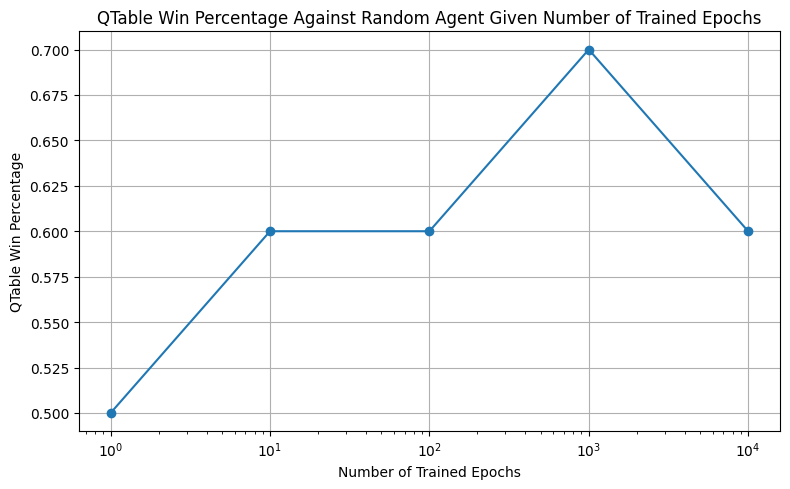

In [ ]:
QTable_vs_random = []
epochs_trained = [1, 10, 100, 1000, 10000]

QTable_vs_random.append(percentage_calculator(qt_vs_random_one, 'P one'))
QTable_vs_random.append(percentage_calculator(qt_vs_random_ten, 'P one'))
QTable_vs_random.append(percentage_calculator(qt_vs_random_hun, 'P one'))
QTable_vs_random.append(percentage_calculator(qt_vs_random_thou, 'P one'))
QTable_vs_random.append(percentage_calculator(qt_vs_random_ten_thou, 'P one'))

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, QTable_vs_random, marker='o', linestyle='-')
plt.xscale('log')
plt.title('QTable Win Percentage Against Random Agent Given Number of Trained Epochs')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('QTable Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

###QTable vs Random Agent Results
<sup>Written by Ashly Hervey</sub>

When training the initially empty Q-Table against a random agent we found that, overall, as the number of training iterations (epochs) increased the win rate increased. For a single iteration against the random agent the random agent and Q-Table agents performed equally as well, over the next three trials (ten, one hundred, and one thousand) the Q-Table agent performed increasingly well with an increased win rate of sixty to seventy percent. Finally, the Q-Table agents win rate decreased from seventy to sixty percent after being trained for ten thousand iterations. When looking at the overall performance of the Q-Table agent it was found that the Q-Table agent nearly always performed better than the random agent and excluding the trial that had trained for ten thousand iterations there wasn’t a decrease in the win rate overtime. We believe the Q-Table agent had a decrease in win rate after ten thousand training iterations because of chance. The game states that were played against the random agent were probably new, making it more difficult for the QTable agent to perform well against it, decreasing its win rate, though it still won more times than it lost.

## Data Collected for Data QTable vs Random Agent

###Explanation of Experiment:
<sup>Written by Ashly Hervey</sub>

For this experiment we tested how well a Q-Table populated by our data and trained over a number of epochs performed against a random agent. We tested its performance after training it against itself for varying numbers of epochs. With each epoch a new game was played and the states from those games were added to the Data QTable on top of the initial 67556 states if they weren’t already in the table, growing the size of the QTable with each game played. After each training session for a varying number of epochs we played the Data Q-Table agent against a random agent for twenty games and recorded the average of that as its performance (win rate) for that number of epochs. We did this for one, ten, one hundred, one thousand, and ten thousand iterations to highlight the Data Q-Table agent’s performance over time.

In [ ]:
#Written by Livia
data_QTable = reset_QTable()
build_data_QTable()
connect_4_train(1, data_QTable)
dqt_vs_random_one = connect_4_vs_random(data_QTable)

connect_4_train(9, data_QTable)
dqt_vs_random_ten = connect_4_vs_random(data_QTable)

connect_4_train(90, data_QTable)
dqt_vs_random_hun = connect_4_vs_random(data_QTable)

connect_4_train(900, data_QTable)
dqt_vs_random_thou = connect_4_vs_random(data_QTable)

In [ ]:
connect_4_train(9000, data_QTable)
dqt_vs_random_ten_thou = connect_4_vs_random(data_QTable)

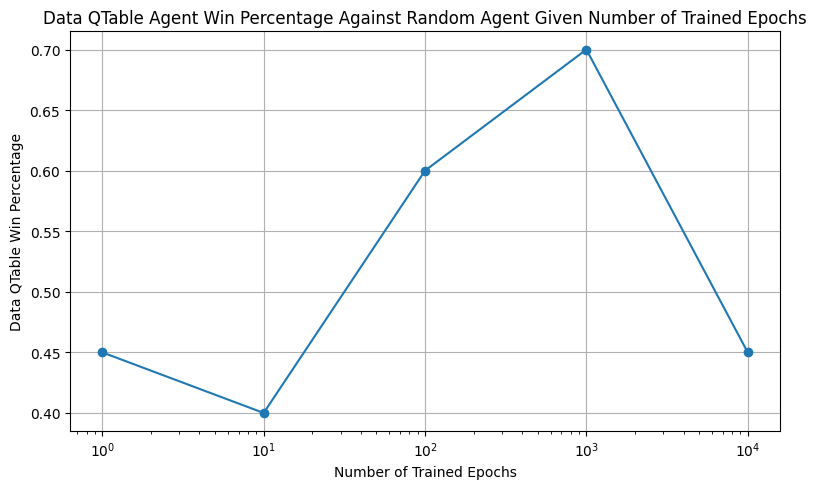

In [ ]:
data_QTable_vs_random = []
epochs_trained = [1, 10, 100, 1000, 10000]

data_QTable_vs_random.append(percentage_calculator(dqt_vs_random_one, 'P one'))
data_QTable_vs_random.append(percentage_calculator(dqt_vs_random_ten, 'P one'))
data_QTable_vs_random.append(percentage_calculator(dqt_vs_random_hun, 'P one'))
data_QTable_vs_random.append(percentage_calculator(dqt_vs_random_thou, 'P one'))
data_QTable_vs_random.append(percentage_calculator(dqt_vs_random_ten_thou, 'P one'))

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, data_QTable_vs_random, marker='o', linestyle='-')
plt.xscale('log')
plt.title('Data QTable Agent Win Percentage Against Random Agent Given Number of Trained Epochs')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('Data QTable Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

###Data QTable vs Random Agent Results
<sup>Written by Ashly Hervey</sub>

When training the Data QTable against a random agent we found that initially the Data QTable agent did not perform as well as the random agent. For the first two trials, one and ten, the random agent performed better than the Data QTable agent with a fifty five to sixty percent win rate over the Data QTable. For the next two trials however the Data QTable started to perform better than the random agent with average win rates of sixty to seventy percent. Finally for the trial with ten thousand epochs the Data QTable once again performed poorly with an only forty five percent win rate against the random agent. These results are a bit hard to decipher as the Data QTable performed worse overall than the random agent. The potential reason for this would be luck, as the random agent probably introduced new game states to the Data QTable making it hard to determine what the next best state should be for the Data QTable agent. The Data QTable did show consistent improvement between the second and fourth trials that were performed though meaning that overall it improved more than it didn’t.

## Data Collected for QTable vs Data QTable

### QTable vs Data QTable trained seperately and made to Compete

###Explanation of Experiment:
<sup>Written by Ashly Hervey</sub>

For this experiment we tested how well the initially empty Q-Table performed against the Data Q-Table. We trained the QTable agent against itself for a number of epochs and did the same thing for the Data QTable agent. Then we played them against each other after training them separately. We made them play twenty games against each other for each trial and recorded the average win rate for the QTable agent and Data QTable agent to show the results of both agents. We did this for one, ten, one hundred, one thousand, and ten thousand iterations to highlight the Q-Table agent’s performance over time.

In [ ]:
#Written by Ashly
QTable = reset_QTable()
data_QTable = reset_QTable()
build_data_QTable()
connect_4_train(1, QTable)
connect_4_train(1, data_QTable)
dqt_vs_qt_single_one = connect_4_compete(QTable, data_QTable, 20)

connect_4_train(9, QTable)
connect_4_train(9, data_QTable)
dqt_vs_qt_single_ten = connect_4_compete(QTable, data_QTable, 20)

connect_4_train(90, QTable)
connect_4_train(90, data_QTable)
dqt_vs_qt_single_hun = connect_4_compete(QTable, data_QTable, 20)

connect_4_train(900, QTable)
connect_4_train(900, data_QTable)
dqt_vs_qt_single_thou = connect_4_compete(QTable, data_QTable, 20)

In [ ]:
connect_4_train(9000, QTable)
connect_4_train(9000, data_QTable)
dqt_vs_qt_single_ten_thou = connect_4_compete(QTable, data_QTable, 20)

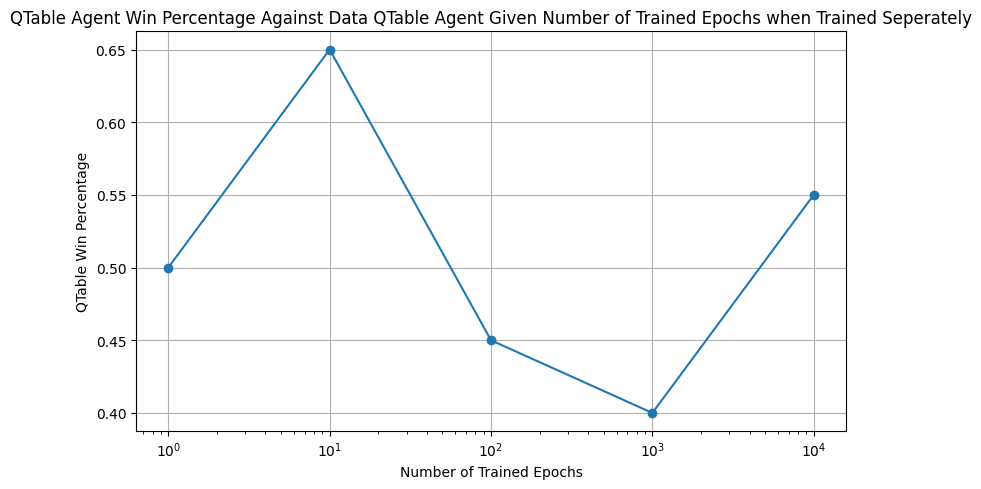

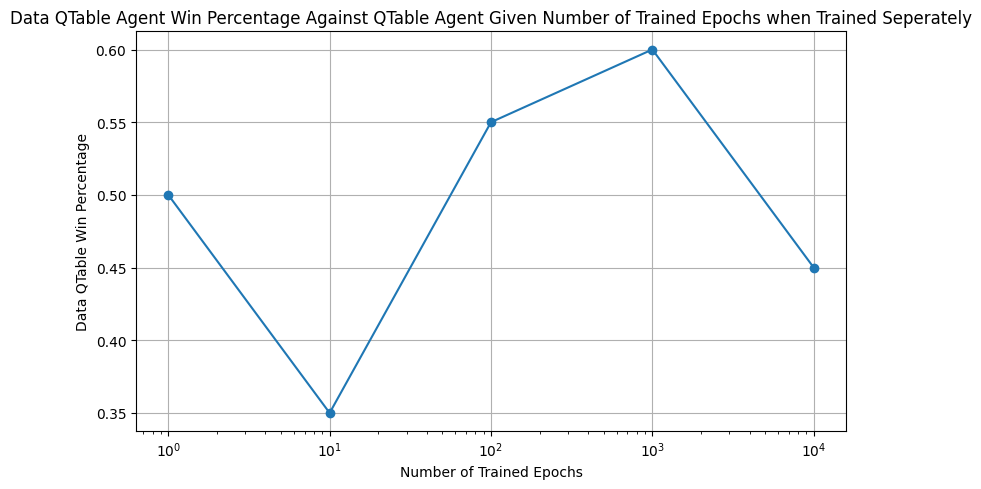

In [ ]:
QTable_vs_data_QTable_qt_win_s = []
QTable_vs_data_QTable_dqt_win_s = []
epochs_trained = [1, 10, 100, 1000, 10000]

QTable_vs_data_QTable_qt_win_s.append(percentage_calculator(dqt_vs_qt_single_one, 'P one'))
QTable_vs_data_QTable_qt_win_s.append(percentage_calculator(dqt_vs_qt_single_ten, 'P one'))
QTable_vs_data_QTable_qt_win_s.append(percentage_calculator(dqt_vs_qt_single_hun, 'P one'))
QTable_vs_data_QTable_qt_win_s.append(percentage_calculator(dqt_vs_qt_single_thou, 'P one'))
QTable_vs_data_QTable_qt_win_s.append(percentage_calculator(dqt_vs_qt_single_ten_thou, 'P one'))

QTable_vs_data_QTable_dqt_win_s.append(percentage_calculator(dqt_vs_qt_single_one, 'P two'))
QTable_vs_data_QTable_dqt_win_s.append(percentage_calculator(dqt_vs_qt_single_ten, 'P two'))
QTable_vs_data_QTable_dqt_win_s.append(percentage_calculator(dqt_vs_qt_single_hun, 'P two'))
QTable_vs_data_QTable_dqt_win_s.append(percentage_calculator(dqt_vs_qt_single_thou, 'P two'))
QTable_vs_data_QTable_dqt_win_s.append(percentage_calculator(dqt_vs_qt_single_ten_thou, 'P two'))

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, QTable_vs_data_QTable_qt_win_s, marker='o', linestyle='-')
plt.xscale('log')
plt.title('QTable Agent Win Percentage Against Data QTable Agent Given Number of Trained Epochs when Trained Seperately')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('QTable Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, QTable_vs_data_QTable_dqt_win_s, marker='o', linestyle='-')
plt.xscale('log')
plt.title('Data QTable Agent Win Percentage Against QTable Agent Given Number of Trained Epochs when Trained Seperately')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('Data QTable Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

### QTable vs Data QTable trained seperately and made to Compete Results
<sup>Written by Ashly Hervey</sub>

When comparing the performance of the initially empty QTable against the Data QTable we found that the agents performed about the same overall. For the first trial the agents performed exactly the same with a fifty percent win rate each. For the second trial the QTable agent won over the Data QTable agent with a sixty five percent win rate. For the third trial the Data QTable agent performed better with a fifty five percent win rate, For the fourth trial the Data QTable won again with a sixty percent win rate. Finally for the fifth trial the QTable won against the Data QTable with a fifty five percent win rate. From these results it can be seen that the two agents basically tied in terms of wins vs losses. When the Data QTable agent won its win rate was slightly higher than that of the initially empty QTable agent’s win rate so this agent could be seen to be performing slightly better though the results are not that significant.

### QTable vs Data QTable trained together and made to Compete

###Explanation of Experiment:
<sup>Written by Ashly Hervey</sub>

For this experiment we tested how well the initially empty Q-Table performed against the Data Q-Table. We trained the QTable agent against the Data QTable agent for a number of epochs and then we played them against each other after training them together. We made them play twenty games against each other for each trial and recorded the average win rate for the QTable agent and Data QTable agent to show the results of both agents. We did this for one, ten, one hundred, one thousand, and ten thousand iterations to highlight the Q-Table agent’s performance over time.

In [ ]:
#Written by Ashly
QTable = reset_QTable()
data_QTable = reset_QTable()
build_data_QTable()
connect_4_compete(QTable, data_QTable, 1)
dqt_vs_qt_one = connect_4_compete(QTable, data_QTable, 20)

connect_4_compete(QTable, data_QTable, 9)
dqt_vs_qt_ten = connect_4_compete(QTable, data_QTable, 20)

connect_4_compete(QTable, data_QTable, 90)
dqt_vs_qt_hun = connect_4_compete(QTable, data_QTable, 20)

connect_4_compete(QTable, data_QTable, 900)
dqt_vs_qt_thou = connect_4_compete(QTable, data_QTable, 20)

In [ ]:
connect_4_compete(QTable, data_QTable, 9000)
dqt_vs_qt_ten_thou = connect_4_compete(QTable, data_QTable, 20)

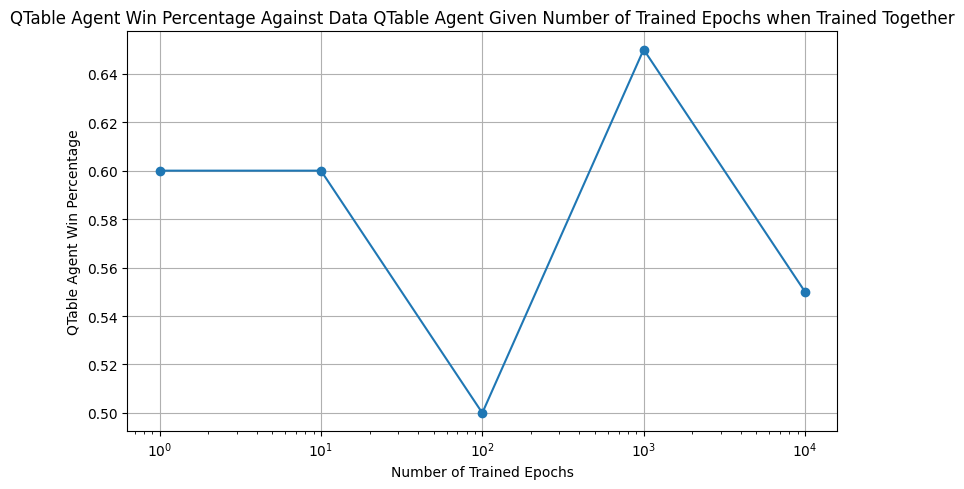

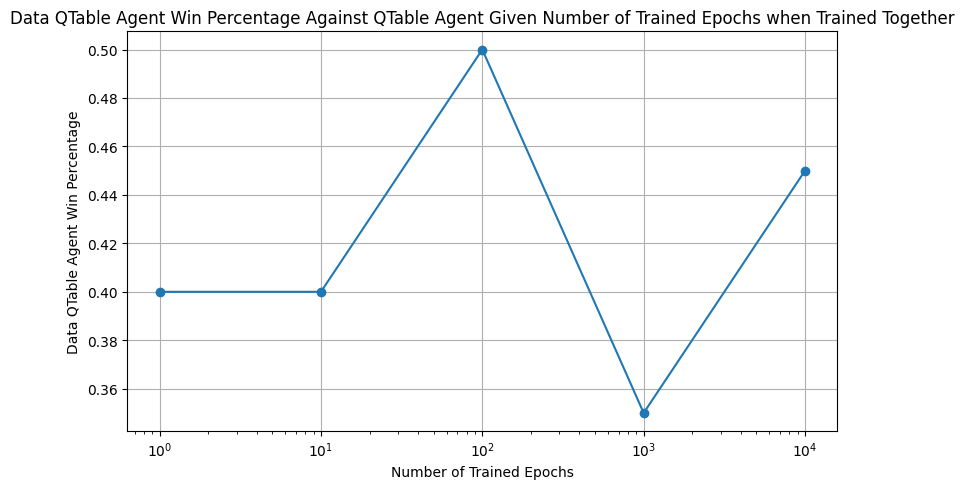

In [ ]:
QTable_vs_data_QTable_qt_win_t = []
QTable_vs_data_QTable_dqt_win_t = []
epochs_trained = [1, 10, 100, 1000, 10000]

QTable_vs_data_QTable_qt_win_t.append(percentage_calculator(dqt_vs_qt_one, 'P one'))
QTable_vs_data_QTable_qt_win_t.append(percentage_calculator(dqt_vs_qt_ten, 'P one'))
QTable_vs_data_QTable_qt_win_t.append(percentage_calculator(dqt_vs_qt_hun, 'P one'))
QTable_vs_data_QTable_qt_win_t.append(percentage_calculator(dqt_vs_qt_thou, 'P one'))
QTable_vs_data_QTable_qt_win_t.append(percentage_calculator(dqt_vs_qt_ten_thou, 'P one'))

QTable_vs_data_QTable_dqt_win_t.append(percentage_calculator(dqt_vs_qt_one, 'P two'))
QTable_vs_data_QTable_dqt_win_t.append(percentage_calculator(dqt_vs_qt_ten, 'P two'))
QTable_vs_data_QTable_dqt_win_t.append(percentage_calculator(dqt_vs_qt_hun, 'P two'))
QTable_vs_data_QTable_dqt_win_t.append(percentage_calculator(dqt_vs_qt_thou, 'P two'))
QTable_vs_data_QTable_dqt_win_t.append(percentage_calculator(dqt_vs_qt_ten_thou, 'P two'))

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, QTable_vs_data_QTable_qt_win_t, marker='o', linestyle='-')
plt.xscale('log')
plt.title('QTable Agent Win Percentage Against Data QTable Agent Given Number of Trained Epochs when Trained Together')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('QTable Agent Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, QTable_vs_data_QTable_dqt_win_t, marker='o', linestyle='-')
plt.xscale('log')
plt.title('Data QTable Agent Win Percentage Against QTable Agent Given Number of Trained Epochs when Trained Together')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('Data QTable Agent Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

### QTable vs Data QTable trained together and made to Compete Results
<sup>Written by Ashly Hervey</sub>

When comparing the performance of the initially empty QTable against the Data QTable we found that the initially empty QTable agents performed significantly better than the Data QTable agent. For the first and second trials the QTable agent had a win rate of sixty percent compared to a forty percent win rate for the Data QTable agent. For the third trial the Data QTable agent and QTable agents were tied with each having a fifty percent win rate. For the fourth trial the QTable had a sixty five percent win rate compared to the Data QTables thirty five percent wine ate. Finally for the fifth trial the QTable had a fifty five percent win rate. Overall there were a few times when the win rate was close to being even or was even but the Data QTable agent never performed better than the QTable agent, it was always either just as good as the QTable agent or worse than it. These results mean that the initially empty QTable agent performs consistently better than the Data QTable agent when the agents are trained together as compared to separately when their results were closer to a tie.

## Data Collected for QTable vs Person

###Explanation of Experiment:
<sup>Written by Ashly Hervey</sub>

For this experiment we tested how well the initially empty Q-Table performed against a person. We trained the QTable agent against itself for a number of epochs and then we played against it. We played five games against the QTable agent for each trial and recorded the average win rate for the QTable agent (we only played five games against it unlike the usual twenty games as twenty games felt excessive as a human player with more control). We did this for one, ten, one hundred, one thousand, and ten thousand iterations to highlight the Q-Table agent’s performance over time.

In [ ]:
#Written by Ashly bug fixed by Livia
QTable = reset_QTable()
connect_4_train(1, QTable)
qt_vs_person_one = connect_4_vs_person(5, QTable)

connect_4_train(9, QTable)
epsilon = .99
qt_vs_person_ten = connect_4_vs_person(5, QTable)
epsilon_reset()

connect_4_train(90, QTable)
epsilon = .9
qt_vs_person_hun = connect_4_vs_person(5, QTable)
epsilon_reset()

connect_4_train(900, QTable)
epsilon = .1
qt_vs_person_thou = connect_4_vs_person(5, QTable)
epsilon_reset()

In [ ]:
connect_4_train(9000, QTable)
epsilon = .1
qt_vs_person_ten_thou = connect_4_vs_person(5, QTable)
epsilon_reset()

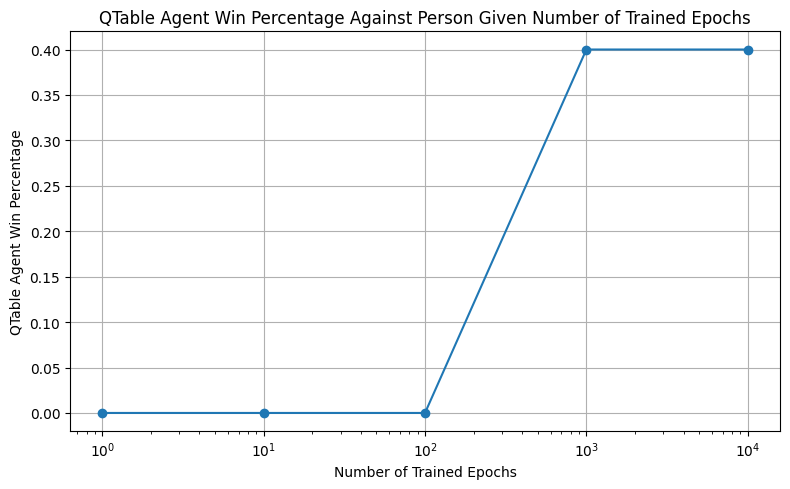

In [ ]:
QTable_vs_person = []
epochs_trained = [1, 10, 100, 1000, 10000]

QTable_vs_person.append(percentage_calculator(qt_vs_person_one, 'P one'))
QTable_vs_person.append(percentage_calculator(qt_vs_person_ten, 'P one'))
QTable_vs_person.append(percentage_calculator(qt_vs_person_hun, 'P one'))
QTable_vs_person.append(percentage_calculator(qt_vs_person_thou, 'P one'))
QTable_vs_person.append(percentage_calculator(qt_vs_person_ten_thou, 'P one'))

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, QTable_vs_person, marker='o', linestyle='-')
plt.xscale('log')
plt.title('QTable Agent Win Percentage Against Person Given Number of Trained Epochs')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('QTable Agent Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

###QTable vs Person Results
<sup>Written by Ashly Hervey</sub>


When comparing the performance of the initially empty QTable against a person we found that overall the person performed significantly better, especially in the earlier trials. For the first three trials the QTable agent couldn’t win a single game with a zero percent win rate. However, during the last two trials the QTable agent managed to win two of the five games coming out with a forty percent win rate. This increase in win rate shows a significant improvement in the agent's capabilities when trained over more epochs. Though the agent's win rate was much lower than the human win rate, given its growth it can be said that the agent performed well for being an agent vs a human being.

## Data Collected for Data QTable vs Person

###Explanation of Experiment:
<sup>Written by Ashly Hervey</sub>

For this experiment we tested how well the Data Q-Table performed against a person. We trained the Data QTable agent against itself for a number of epochs and then we played against it. We played five games against the Data QTable agent for each trial and recorded the average win rate for the Data QTable agent like in the previous experiment. We did this for one, ten, one hundred, one thousand, and ten thousand iterations to highlight the Data Q-Table agent’s performance over time.

In [ ]:
#Written by Ashly bug fixed by Livia
data_QTable = reset_QTable()
build_data_QTable()
connect_4_train(1, data_QTable)
dqt_vs_person_one = connect_4_vs_person(5, data_QTable)

connect_4_train(9, data_QTable)
epsilon = .99
dqt_vs_person_ten = connect_4_vs_person(5, data_QTable)
epsilon_reset()

connect_4_train(90, data_QTable)
epsilon = .9
dqt_vs_person_hun = connect_4_vs_person(5, data_QTable)
epsilon_reset()

connect_4_train(900, data_QTable)
epsilon = .1
dqt_vs_person_thou = connect_4_vs_person(5, data_QTable)
epsilon_reset()

In [ ]:
connect_4_train(9000, data_QTable)
epsilon = .1
dqt_vs_person_ten_thou = connect_4_vs_person(5, data_QTable)
epsilon_reset()

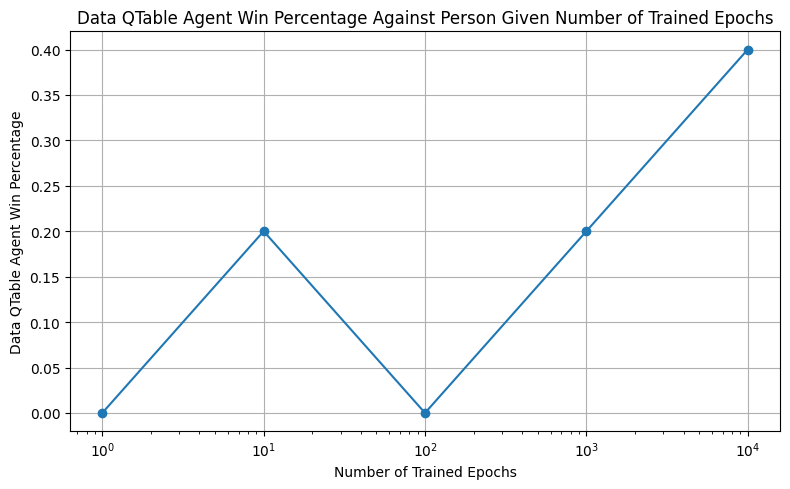

In [ ]:
data_QTable_vs_person = []
epochs_trained = [1, 10, 100, 1000, 10000]

data_QTable_vs_person.append(percentage_calculator(dqt_vs_person_one, 'P one'))
data_QTable_vs_person.append(percentage_calculator(dqt_vs_person_ten, 'P one'))
data_QTable_vs_person.append(percentage_calculator(dqt_vs_person_hun, 'P one'))
data_QTable_vs_person.append(percentage_calculator(dqt_vs_person_thou, 'P one'))
data_QTable_vs_person.append(percentage_calculator(dqt_vs_person_ten_thou, 'P one'))

plt.figure(figsize=(8, 5))
plt.plot(epochs_trained, data_QTable_vs_person, marker='o', linestyle='-')
plt.xscale('log')
plt.title('Data QTable Agent Win Percentage Against Person Given Number of Trained Epochs')
plt.xlabel('Number of Trained Epochs')
plt.ylabel('Data QTable Agent Win Percentage')
plt.grid(True)
plt.tight_layout()

plt.show()

###Data QTable vs Person Results
<sup>Written by Ashly Hervey</sub>

When comparing the performance of the Data QTable against a person we found that overall the person performed better than the Data QTable agent. For the first and third trials the Data QTable agent couldn’t win a single game with a zero percent win rate. During the second and fourth trials the Data QTable agent managed to win one game giving it a twenty percent win rate. Finally during the fifth trial the Data QTable managed to win two games giving it a forty percent win rate. The increase in win rate over the last two trials showed improvement in the agent's capabilities when trained over more epochs. Overall, the Data QTable performed poorly in terms of win rate however it performed well in that it was up against a human and managed to win four games across all twenty five games that were played.

# Findings
<sup>Written by Livia Lane and Ashly Hervey</sub>

The way that our Q-Learning functions are set up, it is very likely that the machine will be doing random moves a lot of the time, since the agent is more likely to make random moves when the epsilon value is high and will always make a random move when it encounters a state it hasn’t seen before. Because of this, when it does too few epochs, it is unlikely to be as effective since it is just randomly choosing outputs. In contrast, when the machine ran through more games (more epochs) it was likely to make less random movements and also began to create Q-Values for more valuable movements, creating a better play strategy for the agent with an increasingly large and Q-table. Overall, both agents typically performed better than the random agent as they had more epochs, they performed similarly to each other with the blank Q-table agent being a bit better, and the both performed poorly against human players but did show improvement in these games when more epochs had been trained across.

<br />

In our experiments we were interested to see if the Q-Table with data added from our dataset would be able to perform better than a Q-Table that was initially empty. Although we had expected the data to be an advantage and allow the dataset Q-Table to perform better, it was actually never able to out-perform the normal Q-Table, with the results showing that on average the dataset table agent performed worse.

<br />

Given the results we found from our experiments we found that Q-learning did show some success when learning Connect-4. Given the limited ability of Q-learning we believe the Q-learning agents would have performed much better had we used Deep Q-learning instead of regular Q-learning so if we were to try and get better results when replicating similar experiments we would probably take a Deep Q-learning approach.

